In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import RMSprop
from keras.metrics import binary_crossentropy
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


2025-10-17 01:37:17.215916: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-17 01:37:17.247036: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('USCensusTraining_final.csv')

In [3]:
df.head()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,<=50K.,>50K.
0,0.031014,-1.151188,1.174684,0.144984,-0.215579,-0.191583,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.840117,-1.090155,1.174684,-0.145406,-0.215579,-1.405652,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.042541,0.303594,-0.458489,-0.145406,-0.215579,-0.191583,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1.060782,0.504492,-1.275076,-0.145406,-0.215579,-0.191583,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,-0.778090,1.596531,1.174684,-0.145406,-0.215579,-0.191583,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia,<=50K.,>50K.
count,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,25000.000000,25000.00000,25000.000000,25000.000000,...,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-2.481215e-16,-2.735590e-17,1.381295e-16,9.166001e-17,-2.557954e-17,-2.714273e-16,0.030000,0.06496,0.000200,0.695400,...,0.002560,0.001680,0.000600,0.000480,0.896840,0.017800,0.002000,0.000440,0.760640,0.239360
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.170591,0.24646,0.014141,0.460247,...,0.050533,0.040954,0.024488,0.021904,0.304174,0.132227,0.044678,0.020972,0.426701,0.426701
min,-1.587193e+00,-1.838200e+00,-2.295809e+00,-1.454062e-01,-2.155785e-01,-1.405652e+00,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.780898e-01,-7.252011e-01,-4.584889e-01,-1.454062e-01,-2.155785e-01,-1.915832e-01,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.160961e-01,-8.917494e-02,-5.019558e-02,-1.454062e-01,-2.155785e-01,-1.915832e-01,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.930074e-01,5.270301e-01,7.663911e-01,-1.454062e-01,-2.155785e-01,6.177958e-01,0.000000,0.00000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2.899653e+00,2.405377e+00,2.399565e+00,1.321189e+01,1.064062e+01,1.831864e+00,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 103 entries, age to >50K.
dtypes: float64(6), int64(97)
memory usage: 19.6 MB


In [6]:
df.columns[101]

'<=50K.'

In [7]:
X = df.iloc[:,0:100]

In [8]:
y = df.iloc[:,[-2,-1]]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
scaler = preprocessing.MinMaxScaler().fit(X_train)

In [11]:
X_train_scaled = scaler.transform(X_train)

In [12]:
X_train_scaled

array([[0.44262295, 0.24087481, 0.2173913 , ..., 0.        , 0.        ,
        0.        ],
       [0.54098361, 0.43884812, 0.39130435, ..., 1.        , 0.        ,
        0.        ],
       [0.18032787, 0.25832976, 0.73913043, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.09836066, 0.56246975, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.66963167, 0.47826087, ..., 1.        , 0.        ,
        0.        ],
       [0.04918033, 0.73054653, 0.47826087, ..., 1.        , 0.        ,
        0.        ]], shape=(20000, 100))

In [13]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.354174,0.432464,0.488357,0.010675,0.019893,0.434478,0.030050,0.064950,0.00025,0.696400,...,0.001150,0.003650,0.000400,0.002600,0.00155,0.000600,0.000500,0.895850,0.018650,0.001950
std,0.223473,0.235679,0.213293,0.072970,0.092250,0.308579,0.170729,0.246444,0.01581,0.459823,...,0.033893,0.060306,0.019996,0.050925,0.03934,0.024488,0.022356,0.305463,0.135289,0.044117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.180328,0.261439,0.391304,0.000000,0.000000,0.375000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.327869,0.411986,0.478261,0.000000,0.000000,0.375000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.508197,0.557726,0.652174,0.000000,0.000000,0.625000,0.000000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
model = Sequential(name = "ANN")
model.add(Input(shape=(X_train_scaled.shape[1],),name = "input features"))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    optimizer=RMSprop(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
y_train_single = np.argmax(y_train, axis=1)
history = model.fit(X_train, y_train_single, batch_size=32, epochs=50, verbose=0, validation_split=0.2)

In [16]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

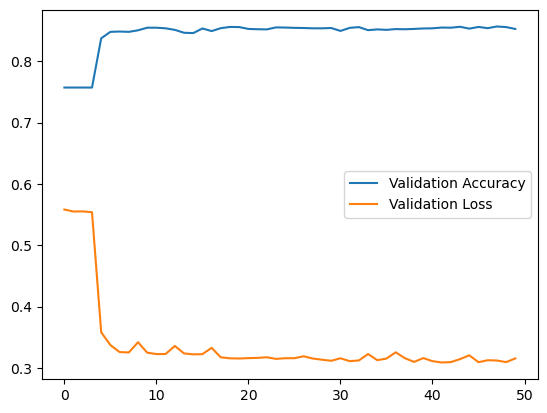

In [17]:
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [18]:
y_test_single = np.argmax(y_test, axis=1)
model.evaluate(X_test, y_test_single)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8466 - loss: 0.3231


[0.32307368516921997, 0.8465999960899353]

In [19]:
preds = model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [20]:
preds

array([[0.00613721],
       [0.01847833],
       [0.24054487],
       ...,
       [0.0043422 ],
       [0.00883239],
       [0.01011318]], shape=(5000, 1), dtype=float32)

In [21]:
confusion_matrix(y_test_single, np.round(preds))

array([[3648,  155],
       [ 612,  585]])

In [22]:
fpr, tpr, thresholds = roc_curve(y_test_single, preds)
roc_auc = auc(fpr, tpr)

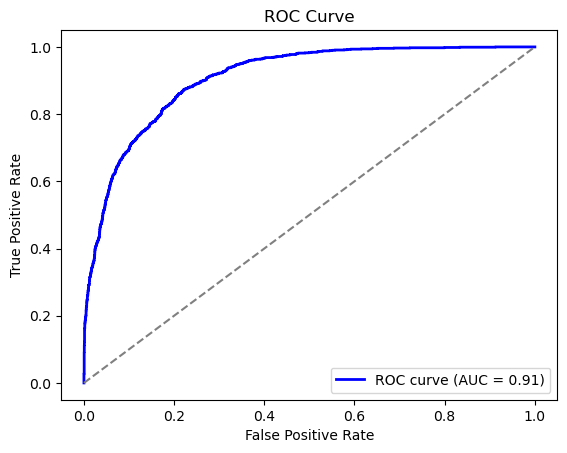

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
model.summary()

Model: "ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,660 (213.52 KB)

 Trainable params: 27,329 (106.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,331 (106.77 KB)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
%pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [27]:
def build_model(optimizer = "RMSprop", lr = 1e-3, units=64, act="sigmoid"):
    model = Sequential(name = "ANN_Tunable")
    model.add(Input(shape=(X_train_scaled.shape[1],), name = "input_features"))
    model.add(Dense(units, activation=act, kernel_initializer="glorot_uniform", name="hidden" ))
    model.add(Dense(1, activation="sigmoid", name="output"))

    if isinstance(optimizer, str):
        opt_name = optimizer.lower()
        if opt_name == "rmsprop":
            opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
        elif opt_name in ("sgd", "sgd_m"):
            opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)
        else:
            opt = tf.keras.optimizers.get(optimizer)
    else:
        opt = optimizer
            
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [28]:
from scikeras.wrappers import KerasClassifier

In [29]:
clf = KerasClassifier(model=build_model, epochs=40, batch_size=32, verbose=2)
param_grid = {
    "model__units": [16, 32, 64], 
    "model__optimizer": ["RMSprop", "sgd"],
    "model__lr":[1e-2, 1e-3]
}

In [30]:
grid = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)

In [31]:
grid.fit(X_train_scaled, y_train_single)

Epoch 1/40
Epoch 1/40
Epoch 1/40
Epoch 1/40
417/417 - 1s - 3ms/step - accuracy: 0.7733 - loss: 0.4799
Epoch 2/40
417/417 - 1s - 3ms/step - accuracy: 0.7278 - loss: 0.5156
Epoch 2/40
417/417 - 1s - 3ms/step - accuracy: 0.7920 - loss: 0.4404
Epoch 2/40
417/417 - 1s - 3ms/step - accuracy: 0.7811 - loss: 0.4614
Epoch 2/40
417/417 - 1s - 1ms/step - accuracy: 0.8274 - loss: 0.3854
Epoch 3/40
417/417 - 1s - 1ms/step - accuracy: 0.8300 - loss: 0.3667
Epoch 3/40
417/417 - 1s - 2ms/step - accuracy: 0.8306 - loss: 0.3739
Epoch 3/40
417/417 - 1s - 3ms/step - accuracy: 0.8255 - loss: 0.3827
Epoch 3/40
417/417 - 1s - 2ms/step - accuracy: 0.8316 - loss: 0.3622
Epoch 4/40
417/417 - 1s - 1ms/step - accuracy: 0.8344 - loss: 0.3540
Epoch 4/40
417/417 - 0s - 1ms/step - accuracy: 0.8343 - loss: 0.3540
Epoch 5/40
417/417 - 1s - 1ms/step - accuracy: 0.8366 - loss: 0.3480
Epoch 5/40
417/417 - 1s - 2ms/step - accuracy: 0.8353 - loss: 0.3494
Epoch 6/40
417/417 - 1s - 3ms/step - accuracy: 0.8328 - loss: 0.3561
E

417/417 - 1s - 1ms/step - accuracy: 0.8501 - loss: 0.3235
Epoch 31/40
417/417 - 1s - 2ms/step - accuracy: 0.8501 - loss: 0.3243
Epoch 32/40
417/417 - 1s - 2ms/step - accuracy: 0.8513 - loss: 0.3225
Epoch 30/40
417/417 - 1s - 3ms/step - accuracy: 0.8502 - loss: 0.3271
Epoch 32/40
417/417 - 1s - 1ms/step - accuracy: 0.8519 - loss: 0.3231
Epoch 32/40
417/417 - 0s - 1ms/step - accuracy: 0.8499 - loss: 0.3242
Epoch 33/40
417/417 - 0s - 1ms/step - accuracy: 0.8498 - loss: 0.3228
Epoch 33/40
417/417 - 1s - 1ms/step - accuracy: 0.8500 - loss: 0.3238
Epoch 34/40
417/417 - 1s - 3ms/step - accuracy: 0.8509 - loss: 0.3218
Epoch 31/40
417/417 - 1s - 3ms/step - accuracy: 0.8499 - loss: 0.3268
Epoch 33/40
417/417 - 1s - 2ms/step - accuracy: 0.8517 - loss: 0.3228
Epoch 34/40
417/417 - 1s - 1ms/step - accuracy: 0.8506 - loss: 0.3233
Epoch 35/40
417/417 - 0s - 1ms/step - accuracy: 0.8487 - loss: 0.3265
Epoch 34/40
417/417 - 0s - 1ms/step - accuracy: 0.8515 - loss: 0.3222
Epoch 35/40
417/417 - 1s - 1ms/s

417/417 - 1s - 2ms/step - accuracy: 0.8484 - loss: 0.3266
Epoch 18/40
417/417 - 1s - 2ms/step - accuracy: 0.8495 - loss: 0.3243
Epoch 23/40
417/417 - 1s - 2ms/step - accuracy: 0.8475 - loss: 0.3286
Epoch 19/40
417/417 - 1s - 2ms/step - accuracy: 0.8479 - loss: 0.3295
Epoch 22/40
417/417 - 1s - 2ms/step - accuracy: 0.8483 - loss: 0.3261
Epoch 19/40
417/417 - 1s - 2ms/step - accuracy: 0.8507 - loss: 0.3241
Epoch 24/40
417/417 - 1s - 2ms/step - accuracy: 0.8488 - loss: 0.3291
Epoch 23/40
417/417 - 1s - 2ms/step - accuracy: 0.8485 - loss: 0.3282
Epoch 20/40
417/417 - 1s - 2ms/step - accuracy: 0.8506 - loss: 0.3256
Epoch 20/40
417/417 - 1s - 2ms/step - accuracy: 0.8500 - loss: 0.3235
Epoch 25/40
417/417 - 1s - 2ms/step - accuracy: 0.8473 - loss: 0.3286
Epoch 24/40
417/417 - 1s - 2ms/step - accuracy: 0.8480 - loss: 0.3272
Epoch 21/40
417/417 - 1s - 2ms/step - accuracy: 0.8492 - loss: 0.3251
Epoch 21/40
417/417 - 1s - 2ms/step - accuracy: 0.8508 - loss: 0.3232
Epoch 26/40
417/417 - 1s - 2ms/s

417/417 - 1s - 2ms/step - accuracy: 0.7584 - loss: 0.4922
Epoch 7/40
417/417 - 1s - 2ms/step - accuracy: 0.7995 - loss: 0.4172
Epoch 11/40
417/417 - 1s - 2ms/step - accuracy: 0.8433 - loss: 0.3330
Epoch 14/40
417/417 - 1s - 2ms/step - accuracy: 0.7661 - loss: 0.4303
Epoch 9/40
417/417 - 1s - 2ms/step - accuracy: 0.7584 - loss: 0.4790
Epoch 8/40
417/417 - 1s - 2ms/step - accuracy: 0.8101 - loss: 0.4110
Epoch 12/40
417/417 - 1s - 2ms/step - accuracy: 0.8437 - loss: 0.3322
Epoch 15/40
417/417 - 1s - 2ms/step - accuracy: 0.7770 - loss: 0.4202
Epoch 10/40
417/417 - 1s - 2ms/step - accuracy: 0.7584 - loss: 0.4661
Epoch 9/40
417/417 - 1s - 1ms/step - accuracy: 0.7972 - loss: 0.4119
Epoch 11/40
417/417 - 1s - 1ms/step - accuracy: 0.8463 - loss: 0.3317
Epoch 16/40
417/417 - 1s - 1ms/step - accuracy: 0.7584 - loss: 0.4540
Epoch 10/40
417/417 - 1s - 3ms/step - accuracy: 0.8158 - loss: 0.4058
Epoch 13/40
417/417 - 1s - 2ms/step - accuracy: 0.8102 - loss: 0.4051
Epoch 12/40
417/417 - 1s - 2ms/step 

417/417 - 1s - 2ms/step - accuracy: 0.8306 - loss: 0.3641
Epoch 38/40
417/417 - 1s - 2ms/step - accuracy: 0.8306 - loss: 0.3574
Epoch 40/40
417/417 - 1s - 1ms/step - accuracy: 0.8282 - loss: 0.3628
417/417 - 1s - 1ms/step - accuracy: 0.8510 - loss: 0.3235
209/209 - 0s - 933us/step
417/417 - 0s - 1ms/step - accuracy: 0.8312 - loss: 0.3569
209/209 - 0s - 898us/step
Epoch 1/40
209/209 - 0s - 862us/step
Epoch 1/40
Epoch 1/40
417/417 - 1s - 3ms/step - accuracy: 0.8300 - loss: 0.3635
Epoch 39/40
417/417 - 1s - 2ms/step - accuracy: 0.7286 - loss: 0.5766
Epoch 2/40
417/417 - 1s - 3ms/step - accuracy: 0.7656 - loss: 0.5410
Epoch 2/40
417/417 - 1s - 2ms/step - accuracy: 0.8306 - loss: 0.3629
Epoch 40/40
417/417 - 1s - 3ms/step - accuracy: 0.7584 - loss: 0.5474
Epoch 2/40
417/417 - 1s - 2ms/step - accuracy: 0.7580 - loss: 0.5369
Epoch 3/40
417/417 - 1s - 2ms/step - accuracy: 0.7656 - loss: 0.5258
Epoch 3/40
417/417 - 1s - 2ms/step - accuracy: 0.8309 - loss: 0.3623
417/417 - 1s - 2ms/step - accura

417/417 - 1s - 2ms/step - accuracy: 0.8278 - loss: 0.3664
Epoch 30/40
417/417 - 1s - 2ms/step - accuracy: 0.8295 - loss: 0.3676
Epoch 32/40
417/417 - 1s - 2ms/step - accuracy: 0.8272 - loss: 0.3721
Epoch 25/40
417/417 - 1s - 2ms/step - accuracy: 0.8292 - loss: 0.3629
Epoch 30/40
417/417 - 1s - 2ms/step - accuracy: 0.8284 - loss: 0.3655
Epoch 31/40
417/417 - 1s - 2ms/step - accuracy: 0.8298 - loss: 0.3667
Epoch 33/40
417/417 - 1s - 2ms/step - accuracy: 0.8291 - loss: 0.3619
Epoch 31/40
417/417 - 1s - 2ms/step - accuracy: 0.8274 - loss: 0.3710
Epoch 26/40
417/417 - 1s - 2ms/step - accuracy: 0.8283 - loss: 0.3646
Epoch 32/40
417/417 - 1s - 2ms/step - accuracy: 0.8297 - loss: 0.3658
Epoch 34/40
417/417 - 1s - 2ms/step - accuracy: 0.8292 - loss: 0.3609
Epoch 32/40
417/417 - 1s - 2ms/step - accuracy: 0.8277 - loss: 0.3699
Epoch 27/40
417/417 - 1s - 2ms/step - accuracy: 0.8280 - loss: 0.3638
Epoch 33/40
417/417 - 1s - 2ms/step - accuracy: 0.8302 - loss: 0.3649
Epoch 35/40
417/417 - 1s - 2ms/s

417/417 - 1s - 2ms/step - accuracy: 0.8246 - loss: 0.3780
Epoch 19/40
417/417 - 1s - 2ms/step - accuracy: 0.8459 - loss: 0.3306
Epoch 19/40
417/417 - 1s - 1ms/step - accuracy: 0.8283 - loss: 0.3670
Epoch 24/40
417/417 - 1s - 1ms/step - accuracy: 0.8250 - loss: 0.3762
Epoch 20/40
417/417 - 1s - 1ms/step - accuracy: 0.8462 - loss: 0.3301
Epoch 20/40
417/417 - 1s - 1ms/step - accuracy: 0.8298 - loss: 0.3656
Epoch 25/40
417/417 - 1s - 3ms/step - accuracy: 0.8442 - loss: 0.3326
Epoch 13/40
417/417 - 1s - 2ms/step - accuracy: 0.8476 - loss: 0.3297
Epoch 21/40
417/417 - 1s - 2ms/step - accuracy: 0.8252 - loss: 0.3744
Epoch 21/40
417/417 - 1s - 2ms/step - accuracy: 0.8299 - loss: 0.3644
Epoch 26/40
417/417 - 1s - 1ms/step - accuracy: 0.8462 - loss: 0.3317
Epoch 14/40
417/417 - 1s - 1ms/step - accuracy: 0.8254 - loss: 0.3729
Epoch 22/40
417/417 - 1s - 1ms/step - accuracy: 0.8297 - loss: 0.3632
Epoch 27/40
417/417 - 1s - 2ms/step - accuracy: 0.8456 - loss: 0.3309
Epoch 15/40
417/417 - 1s - 3ms/s

417/417 - 1s - 2ms/step - accuracy: 0.8401 - loss: 0.3419
Epoch 8/40
417/417 - 1s - 1ms/step - accuracy: 0.8282 - loss: 0.3638
Epoch 3/40
417/417 - 0s - 1ms/step - accuracy: 0.8411 - loss: 0.3400
Epoch 9/40
417/417 - 1s - 1ms/step - accuracy: 0.8329 - loss: 0.3516
Epoch 4/40
417/417 - 1s - 3ms/step - accuracy: 0.8436 - loss: 0.3353
Epoch 15/40
417/417 - 1s - 2ms/step - accuracy: 0.8414 - loss: 0.3383
Epoch 10/40
417/417 - 1s - 3ms/step - accuracy: 0.8399 - loss: 0.3421
Epoch 6/40
417/417 - 1s - 2ms/step - accuracy: 0.8367 - loss: 0.3466
Epoch 5/40
417/417 - 1s - 2ms/step - accuracy: 0.8427 - loss: 0.3369
Epoch 11/40
417/417 - 1s - 2ms/step - accuracy: 0.8437 - loss: 0.3346
Epoch 16/40
417/417 - 1s - 2ms/step - accuracy: 0.8398 - loss: 0.3391
Epoch 7/40
417/417 - 1s - 2ms/step - accuracy: 0.8372 - loss: 0.3437
Epoch 6/40
417/417 - 1s - 2ms/step - accuracy: 0.8434 - loss: 0.3338
Epoch 17/40
417/417 - 1s - 2ms/step - accuracy: 0.8442 - loss: 0.3358
Epoch 12/40
417/417 - 1s - 2ms/step - ac

417/417 - 1s - 2ms/step - accuracy: 0.8499 - loss: 0.3257
Epoch 32/40
417/417 - 1s - 2ms/step - accuracy: 0.8379 - loss: 0.3476
Epoch 5/40
417/417 - 1s - 2ms/step - accuracy: 0.8525 - loss: 0.3205
Epoch 35/40
417/417 - 1s - 2ms/step - accuracy: 0.8516 - loss: 0.3219
Epoch 37/40
417/417 - 1s - 2ms/step - accuracy: 0.8489 - loss: 0.3255
Epoch 33/40
417/417 - 1s - 2ms/step - accuracy: 0.8391 - loss: 0.3440
Epoch 6/40
417/417 - 1s - 2ms/step - accuracy: 0.8512 - loss: 0.3204
Epoch 36/40
417/417 - 1s - 2ms/step - accuracy: 0.8507 - loss: 0.3216
Epoch 38/40
417/417 - 1s - 2ms/step - accuracy: 0.8495 - loss: 0.3251
Epoch 34/40
417/417 - 1s - 1ms/step - accuracy: 0.8403 - loss: 0.3412
Epoch 7/40
417/417 - 1s - 1ms/step - accuracy: 0.8534 - loss: 0.3198
Epoch 37/40
417/417 - 1s - 1ms/step - accuracy: 0.8490 - loss: 0.3244
Epoch 35/40
417/417 - 1s - 2ms/step - accuracy: 0.8414 - loss: 0.3394
Epoch 8/40
417/417 - 1s - 2ms/step - accuracy: 0.8524 - loss: 0.3200
Epoch 38/40
417/417 - 1s - 3ms/step 

417/417 - 1s - 1ms/step - accuracy: 0.8534 - loss: 0.3221
Epoch 35/40
417/417 - 1s - 2ms/step - accuracy: 0.8501 - loss: 0.3225
Epoch 26/40
417/417 - 1s - 2ms/step - accuracy: 0.8464 - loss: 0.3280
Epoch 23/40
417/417 - 1s - 3ms/step - accuracy: 0.8271 - loss: 0.3781
Epoch 23/40
417/417 - 1s - 2ms/step - accuracy: 0.8510 - loss: 0.3213
Epoch 36/40
417/417 - 1s - 1ms/step - accuracy: 0.8273 - loss: 0.3766
Epoch 24/40
417/417 - 1s - 1ms/step - accuracy: 0.8471 - loss: 0.3278
Epoch 24/40
417/417 - 1s - 1ms/step - accuracy: 0.8517 - loss: 0.3217
Epoch 37/40
417/417 - 1s - 3ms/step - accuracy: 0.8512 - loss: 0.3224
Epoch 27/40
417/417 - 1s - 2ms/step - accuracy: 0.8479 - loss: 0.3274
Epoch 25/40
417/417 - 1s - 2ms/step - accuracy: 0.8275 - loss: 0.3752
Epoch 25/40
417/417 - 1s - 2ms/step - accuracy: 0.8506 - loss: 0.3211
Epoch 38/40
417/417 - 1s - 2ms/step - accuracy: 0.8510 - loss: 0.3222
Epoch 28/40
417/417 - 1s - 2ms/step - accuracy: 0.8480 - loss: 0.3275
Epoch 26/40
417/417 - 1s - 2ms/s

417/417 - 0s - 1ms/step - accuracy: 0.8159 - loss: 0.4011
Epoch 17/40
417/417 - 1s - 1ms/step - accuracy: 0.7831 - loss: 0.4178
Epoch 11/40
417/417 - 1s - 1ms/step - accuracy: 0.8156 - loss: 0.4068
Epoch 13/40
417/417 - 1s - 3ms/step - accuracy: 0.8293 - loss: 0.3681
Epoch 24/40
417/417 - 1s - 2ms/step - accuracy: 0.8184 - loss: 0.3976
Epoch 18/40
417/417 - 1s - 2ms/step - accuracy: 0.8006 - loss: 0.4097
Epoch 12/40
417/417 - 1s - 2ms/step - accuracy: 0.8185 - loss: 0.4019
Epoch 14/40
417/417 - 1s - 2ms/step - accuracy: 0.8303 - loss: 0.3670
Epoch 25/40
417/417 - 1s - 2ms/step - accuracy: 0.8193 - loss: 0.3946
Epoch 19/40
417/417 - 1s - 1ms/step - accuracy: 0.8093 - loss: 0.4029
Epoch 13/40
417/417 - 1s - 1ms/step - accuracy: 0.8204 - loss: 0.3978
Epoch 15/40
417/417 - 0s - 1ms/step - accuracy: 0.8203 - loss: 0.3919
Epoch 20/40
417/417 - 0s - 1ms/step - accuracy: 0.8172 - loss: 0.3972
Epoch 14/40
417/417 - 1s - 1ms/step - accuracy: 0.8215 - loss: 0.3942
Epoch 16/40
417/417 - 1s - 1ms/s

417/417 - 0s - 1ms/step - accuracy: 0.7591 - loss: 0.4521
Epoch 7/40
417/417 - 0s - 1ms/step - accuracy: 0.7584 - loss: 0.5374
Epoch 3/40
417/417 - 1s - 1ms/step - accuracy: 0.7584 - loss: 0.5193
417/417 - 1s - 1ms/step - accuracy: 0.7675 - loss: 0.4378
Epoch 4/40
Epoch 8/40
417/417 - 1s - 3ms/step - accuracy: 0.7980 - loss: 0.4147
Epoch 11/40
417/417 - 1s - 3ms/step - accuracy: 0.7656 - loss: 0.5198
Epoch 3/40
417/417 - 1s - 1ms/step - accuracy: 0.7868 - loss: 0.4258
Epoch 9/40
417/417 - 1s - 1ms/step - accuracy: 0.7584 - loss: 0.5015
Epoch 5/40
417/417 - 1s - 1ms/step - accuracy: 0.7656 - loss: 0.5012
Epoch 4/40
417/417 - 1s - 1ms/step - accuracy: 0.8012 - loss: 0.4160
Epoch 10/40
417/417 - 1s - 1ms/step - accuracy: 0.7584 - loss: 0.4838
Epoch 6/40
417/417 - 1s - 3ms/step - accuracy: 0.8089 - loss: 0.4083
Epoch 12/40
417/417 - 1s - 2ms/step - accuracy: 0.7656 - loss: 0.4832
Epoch 5/40
417/417 - 1s - 2ms/step - accuracy: 0.8117 - loss: 0.4082
Epoch 11/40
417/417 - 1s - 1ms/step - accu

417/417 - 1s - 3ms/step - accuracy: 0.8304 - loss: 0.3613
Epoch 29/40
417/417 - 1s - 2ms/step - accuracy: 0.8296 - loss: 0.3624
Epoch 36/40
209/209 - 0s - 1ms/step
417/417 - 1s - 2ms/step - accuracy: 0.8279 - loss: 0.3608
Epoch 36/40
417/417 - 1s - 1ms/step - accuracy: 0.8297 - loss: 0.3605
Epoch 30/40
417/417 - 1s - 1ms/step - accuracy: 0.8305 - loss: 0.3620
Epoch 37/40
417/417 - 0s - 1ms/step - accuracy: 0.8297 - loss: 0.3603
Epoch 37/40
417/417 - 0s - 1ms/step - accuracy: 0.8300 - loss: 0.3598
Epoch 31/40
417/417 - 0s - 1ms/step - accuracy: 0.8303 - loss: 0.3613
Epoch 38/40
417/417 - 0s - 1ms/step - accuracy: 0.8296 - loss: 0.3596
Epoch 38/40
417/417 - 0s - 1ms/step - accuracy: 0.8313 - loss: 0.3591
Epoch 32/40
417/417 - 0s - 1ms/step - accuracy: 0.8292 - loss: 0.3606
Epoch 39/40
417/417 - 0s - 1ms/step - accuracy: 0.8292 - loss: 0.3588
Epoch 39/40
417/417 - 0s - 1ms/step - accuracy: 0.8312 - loss: 0.3584
Epoch 33/40
417/417 - 0s - 1ms/step - accuracy: 0.8312 - loss: 0.3603
Epoch 40

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'model__lr': [0.01, 0.001], 'model__optimizer': ['RMSprop', 'sgd'], 'model__units': [16, 32, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,<function bui...x7ff80ff4ee80>


In [32]:
print("Best params:", grid.best_params_)
print("Best CV Acc:", grid.best_score_)

Best params: {'model__lr': 0.01, 'model__optimizer': 'RMSprop', 'model__units': 16}
Best CV Acc: 0.8488501467515883
